# Fourieranalyse fuer Dummies
Eine schnelle Einfuehrung ohne viel Mathe
Ich werde immer wieder gefragt, wie die FFT oder das Wasserfalldiagramm z.B. in diversen SDR Anwendungen zu interpretieren ist. Eventuell kann diese kleine Einfuehrung etwas zum Verstaendnis beitragen.

Du findest hier keine Herleitung und auch keine mathematischen Grundlagen. Aber wenn Du Dich dafuer interessierst, mache ich dazu auch gern einen Workshop :)

Legen wir los.


In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def do_fft(x):
    fft_x = np.fft.fft(x)
    n = len(fft_x)
    freq = np.fft.fftfreq(n, 1/f_s)
    half_n = int(np.ceil(n/2.0))
    fft_x_half = (2.0 / n) * fft_x[:half_n]
    freq_half = freq[:half_n]
    plt.plot(freq_half, np.abs(fft_x_half))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    return fft_x


* numpy ist ein Package fuer numerische Berechnungen in Python
* Mathplotlib ist ein Package fuer das Plotten mathematischer Funktionen
* do_fft macht die FFT fuer uns und plottet das Ergebnis


<Container object of 3 artists>

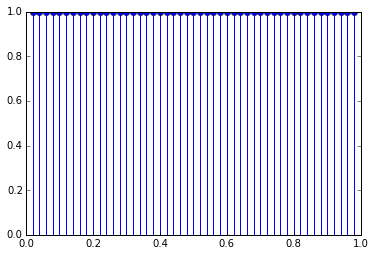

In [75]:
f_s = 50.0 # Hz

time = np.arange(0.0, 3.0, 1/f_s) #Zeitachse

plt.stem(time[1:50],np.ones(50)[1:50]) #Sampelzeitpunkte plotten

* Wir sampeln 50 mal pro Sekunde
* time enthaelt jetzt 150 Werte (3 Sekunden mit je 50 Sampels)
* Man kann sagen, wir sampeln 3 Sekunden lang 50 Werte pro Sekunde.
* Das ergibt einen Abstand der einzelnen Sampels von 1/50 = 0.02 Sekunden

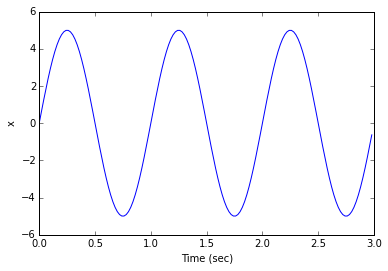

In [76]:
f = 1.0 # Hz
x = 5 * np.sin(2 * np.pi * f * time)

plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

* Wir erzeugen ein Sinussignal
* Samplefrequenz: 50 Hz, also 50 Samples pro Sekunde (50 S/s)
* Frequenz des Nutzsignals: 1 Hz (1 Schwingung pro Sekunde)

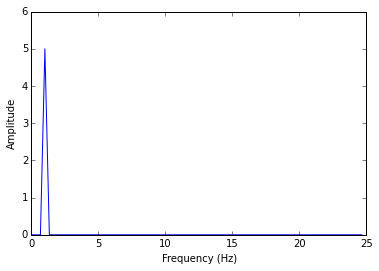

In [77]:
fft_x = do_fft(x)

* Wir transformieren das Sinussagen mittels der FFT in den Frequenzbereich
* Wir sehen einen Peak bei 1 Hz
* Der Peak hat eine Amplitude von 5

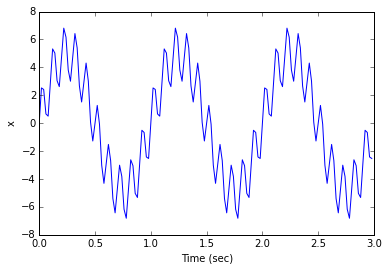

In [78]:
x = x + 2 * np.sin(10 * 2 * np.pi * f * time)

plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

* Wir ueberlagern die Sinusfunktion mit einer weiteren Sinusfunkltion
* Wie gross ist deren Frequenz und Amplitude?

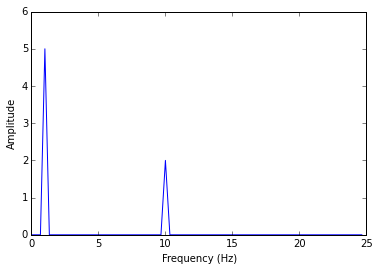

In [141]:
fft_x = do_fft(x)

* Im Zeitbereich werden beide Sinussignale und deren Amplituden sichtbar

In [130]:
print(fft_x[1:10])

[  1.81075131e-13 +4.34488036e-13j  -1.36950112e-13 +1.87898962e-13j
  -6.97946807e-13 -3.75000000e+02j   6.37510105e-14 -4.00537450e-14j
   1.49760213e-13 -5.44664175e-14j  -4.62418682e-14 +1.80390160e-13j
  -1.46838296e-13 -1.10553164e-13j   7.73182797e-14 +5.26975321e-14j
  -1.28442715e-13 -1.84592758e-13j]


* Die FFT erzeugt ein komplexes Frequenzspektrum
* Jede komplexe Zahl beschreibt einen Vektor mit einem bestimmten Winkel und einer bestimmten Laenge.
* Die Laenge des Vektors ist des Aequivalent zur Amplitude

In [131]:
print(abs(fft_x[1:40]))

[  4.70710162e-13   2.32510974e-13   3.75000000e+02   7.52894005e-14
   1.59357183e-13   1.86222770e-13   1.83802849e-13   9.35689386e-14
   2.24882230e-13   5.83961953e-14   3.74402492e-14   6.14323770e-14
   7.84797373e-14   6.79572427e-14   8.95349430e-14   5.51123704e-14
   1.51136116e-13   2.17599933e-14   1.94233924e-13   1.82566948e-13
   3.48429318e-14   5.19340890e-14   1.93480738e-13   2.54848369e-13
   1.97773486e-13   1.39906279e-13   1.88728665e-13   2.98342131e-14
   6.83976968e-14   1.50000000e+02   7.40284322e-14   1.26774874e-13
   2.95170482e-14   2.45881253e-13   2.21969618e-13   2.26781593e-13
   1.71230812e-13   6.04787774e-14   2.83279596e-14]


* abs() berechnet den Betrag (den Absolutwert) einer komplexen Zahl
* Der Betrag ener komplexen Zahlt entspricht der Laenge des von ihr dargestellten Vektors
* Die Frequenzaufloesung der FFT ist nur halb so gross wie unsere Sampelfrequenz
* Die Aufloesung betraegt daher nur 0.4 Hz anstatt 0.2 Hz
* Der 1 Hz Peak ist bei 3x0.4 Hz, der 10 Hz Peak ist bei 30x0.4 Hz
* Die Amplituden sind stimmen nicht mit den tatsaechlichen amplituden ueberein, da sie nicht normalisiert wurden

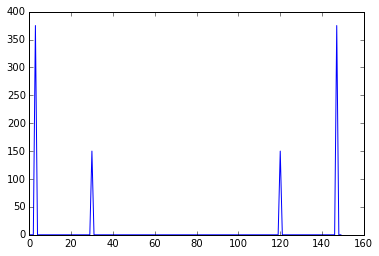

In [132]:
plt.plot(abs(fft_x))

* Eine Kleinigkeit haben wir noch verschwiegen und wollen sie hier erwaehnen
* Das von der FFT erzeuge Frequenzspektrum ist symmetrisch, wir haben bisher immer nur die Haelfte gesehen (75 von 150 Werten)
* Shannon!

In [135]:
i_x = np.fft.ifft(fft_x)

* man kann die FFT auch umkehren

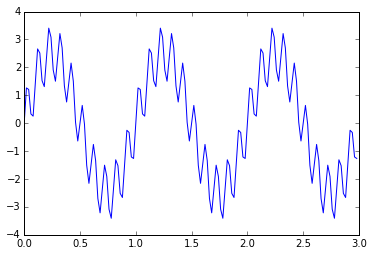

In [138]:
plt.plot(time,i_x)

* die inverse FFT erzeugt aus dem (komplexen) Frequenzspektrum das Signal im Zeitbereich

In [142]:
fft_x[30] = 0
fft_x[-30] = 0

* Der 10 Hz Anteil haben wir im Frequenzspektrum jetzt auf 0 gesetzt
* Wie sieht das Signal jetzt im Zeitbereich aus?

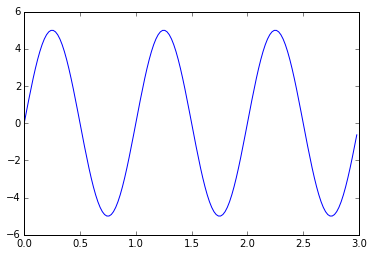

In [143]:
i_x = np.fft.ifft(fft_x)
plt.plot(time,i_x)

* Wir haben das urspruengliche Signal mittels FFT in den Frequenzbereich transformiert
* Wir haben das Signal im Frequenzbereich gefiltert
* Wir haben das Signak mittels inverser FFT zurueck in den Zeitbereich transformiert